In [1]:
import pandas as pd

In [3]:
ds = pd.read_csv("../datasets/iris_plant/PCA_iris_plant.csv")

In [4]:
ds["variety"] = ds["variety"].replace([1],0)

In [5]:
ds["variety"] = ds["variety"].replace([2],1)

In [7]:
X = ds[["x1","x2"]]
y = ds[["variety"]]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [36]:
def entrenar_clf(model,X_train,X_test,y_train,y_test,tittle):
    from sklearn.metrics import confusion_matrix
    import seaborn as sbs
    import matplotlib.pyplot as plt
    model.fit(X_train,y_train.values.ravel())
    model_predicted = model.predict(X_test)
    confusion_ma = confusion_matrix(y_test,model_predicted)
    print("Predicción del modelo:")
    print(model_predicted)
    print("Actual:")
    print(y_test.values.ravel())
    #calculando la presicion (accuracy) del clasificador
    accuracy = model.score(X_test,y_test.values.ravel())
    print('accuracy',accuracy*100,'%')
    print('----------- \n')
    print("Matriz de confusión")
    w=["w1","w2"]
    sbs.heatmap(data=confusion_ma,cmap="Pastel1",annot=True,xticklabels=w,yticklabels=w)
    plt.xlabel("Actual")
    plt.ylabel("predicción")
    plt.title(tittle)

In [90]:
def plot_roc_curve(model,X_test,y_test):
    from sklearn.metrics import roc_curve,auc
    import matplotlib.pyplot as plt
    model.fit(X_test,y_test.values.ravel())
    y_scores = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Verdadero Positivo')
    plt.xlabel('Falso Positivo')
    plt.show()

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.35)

Predicción del modelo:
[1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0]
Actual:
[1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0]
accuracy 94.33962264150944 %
----------- 

Matriz de confusión


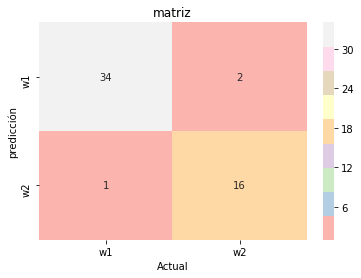

In [109]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)
entrenar_clf(model=knn,X_train=x_train,X_test=x_test,y_train=y_train,y_test=y_test,tittle="matriz")

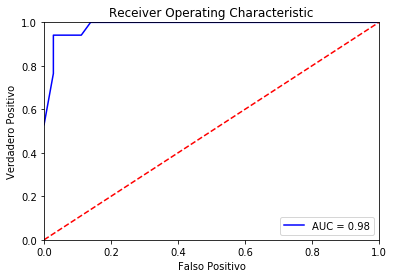

In [110]:
plot_roc_curve(model=knn,X_test=x_test,y_test=y_test)